<a href="https://colab.research.google.com/github/AisyaChalvinaIzumi/AisyaChalvinaIzumi/blob/main/week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PRACTICUM**

In [18]:
from google.colab import drive

#Accessing My Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


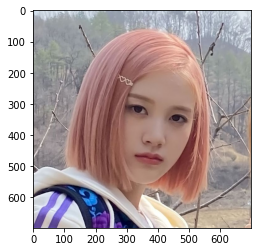

In [19]:
import cv2 as cv 
from google.colab.patches import cv2_imshow 
from skimage import io 
import matplotlib.pyplot as plt 
import numpy as np

img = cv.imread('/content/drive/MyDrive/Week2/J.tiff')
image = cv.cvtColor(img,cv.COLOR_BGR2RGB)
plt.imshow(image)

1. Performs a linear transformation of brightness by entering a certain constant value and produces 
a color. 

 Changing Image Brightness 
---------------------------
 Enter the brightness value: 50


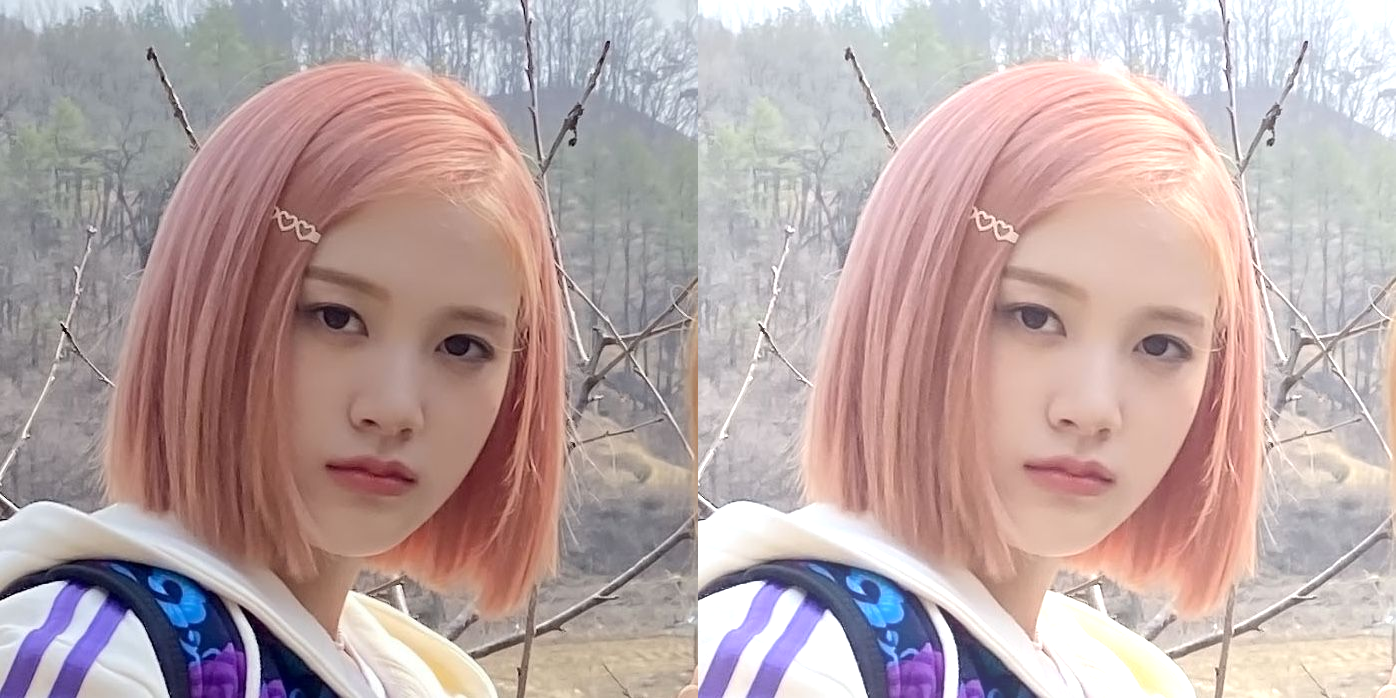

In [20]:
print(' Changing Image Brightness ')
print('---------------------------')
try:
  brightness = int(input(' Enter the brightness value: '))
except ValueError:
  print('Error, Not a number')

original = cv.imread('/content/drive/MyDrive/Week2/J.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

#access per pixel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y, x, c] = np.clip(original[y, x, c] + brightness, 0, 255)

# simple way without loop
# brightness_image = cv.convertScaleAbs(original, beta=brightness)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

# **TASK**


1.   Implement contrast transformation in Google Collaboratory using the formula written 
in the Theoretical background section

 Changing Image Brightness 
---------------------------
 Enter the brightness value: 60
Enter the contrast value: 1.5


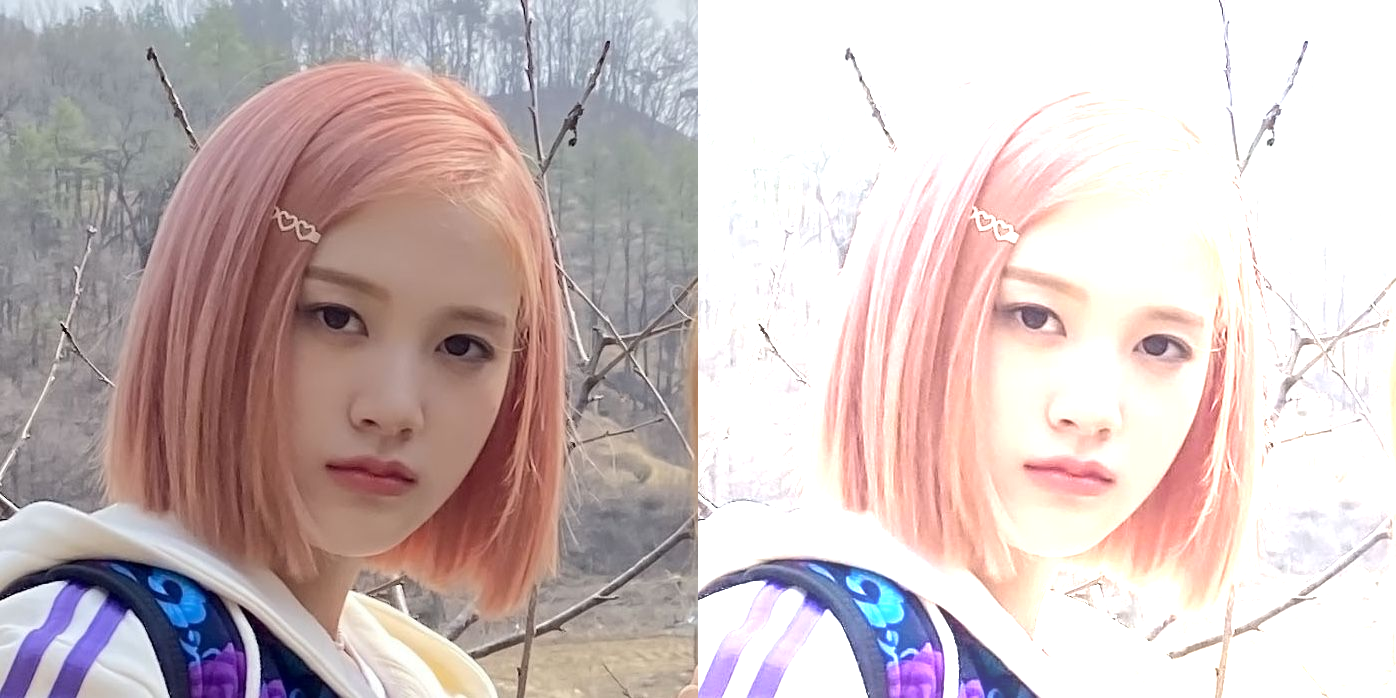

In [21]:
print(' Changing Image Brightness ')
print('---------------------------')
try :
  brightness = int(input(' Enter the brightness value: '))
  contrast = float(input( 'Enter the contrast value: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/Week2/J.tiff')
contrast_image = np.zeros(original.shape, original.dtype)

#access per pixel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      contrast_image[y, x, c] = np.clip(contrast*original[y, x, c] + brightness, 0, 255)

final_frame = cv.hconcat((original, contrast_image))
cv2_imshow(final_frame)

2.   Implement transformation of logarithmic brightness on Google Colaboratory using the 
formula written in the Theoretical Background Reviews

 Changing Image Brightness 
---------------------------
 Enter the brightness value: 40


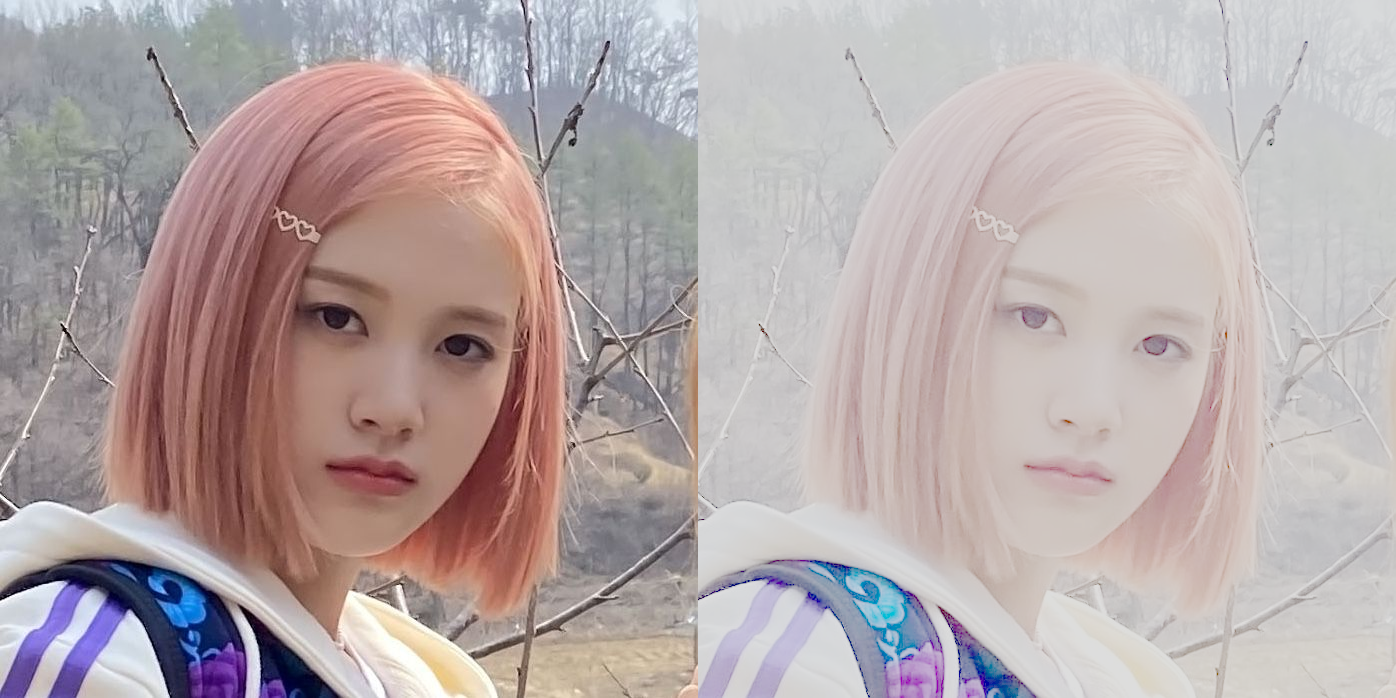

In [22]:
print(' Changing Image Brightness ')
print('---------------------------')
try :
  brightness = int(input(' Enter the brightness value: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/Week2/J.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

#access per pixel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y, x, c] = np.clip(brightness * (np.log(1 + original[y, x, c])), 0, 255)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

3. mplement grayscale transformation using the averaging, lightness, and luminance
method on Google Colaboratory using the formula written in the Theoretical 
Background Reviews

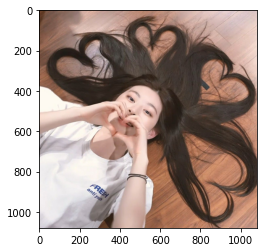

In [23]:
img_a = cv.imread('/content/drive/MyDrive/Week2/seeun.tiff')
img_rgb = cv.cvtColor(img_a,cv.COLOR_BGR2RGB)
plt.imshow(img_rgb)

**Averaging**

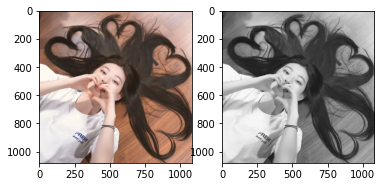

In [24]:
img_b = img_rgb
img_a = cv.imread('/content/drive/MyDrive/Week2/seeun.tiff')
img_rgb1 = cv.cvtColor(img_a, cv.COLOR_BGR2RGB)

img_b[:] = img_b.mean(axis=-1, keepdims=1)
fig, ax = plt.subplots(1,2)
ax[0].imshow(img_rgb1)
ax[1].imshow(img_b)

**Lightness**

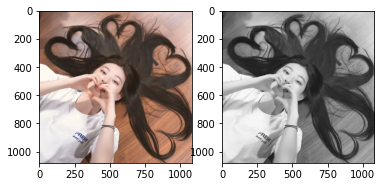

In [26]:
img_l = img_rgb
img_l[:] = np.max(img_l,axis=-1,keepdims=10)/2+np.min(img_l,axis=-1,keepdims=10)/2
fig, ax = plt.subplots(1,2)
ax[0].imshow(img_rgb1)
ax[1].imshow(img_l)

**Luminance**

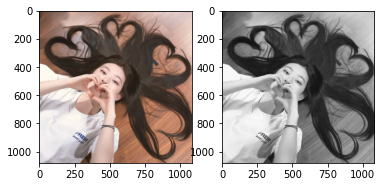

In [27]:
image_c = img_rgb
R, G, B = image_c[:,:,0], image_c[:,:,1], image_c[:,:,2]
gray_image_c = (0.21 * R) + (0.72 * G) + (0.07 * B)
fig, ax = plt.subplots(1, 2)
ax[0].imshow(img_rgb1)
ax[1].imshow(gray_image_c, cmap='gray')

4. Show certain colors in the image , and change other colors to grayscale.

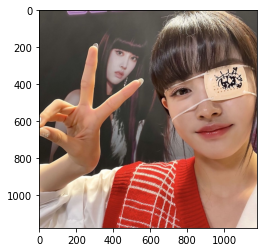

In [28]:
img_a = cv.imread('/content/drive/MyDrive/Week2/yoon.tiff')
img_rgb = cv.cvtColor(img_a,cv.COLOR_BGR2RGB)
plt.imshow(img_rgb)

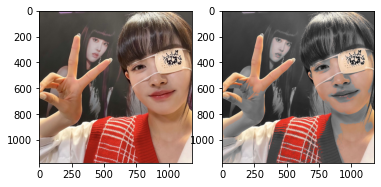

In [29]:
img_y = cv.imread('/content/drive/MyDrive/Week2/yoon.tiff')
ret, mask = cv.threshold(img_y[:,:,2], 180, 255, cv.THRESH_BINARY)

mask3 = np.zeros_like(img_y)
mask3[:,:,0] = mask
mask3[:,:,1] = mask
mask3[:,:,2] = mask

red = cv.bitwise_and(img_rgb, mask3)

gray = cv.cvtColor(img_y, cv.COLOR_BGR2GRAY)
img_y = cv.cvtColor(gray, cv.COLOR_GRAY2BGR)

gray = cv.bitwise_and(img_y, 255 - mask3)

out = gray + red

fig, ax = plt.subplots(1,2)
ax[0].imshow(img_rgb)
ax[1].imshow(out, cmap='gray')